In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
des_scale = 270
lsst_scale = 200

In [10]:
#Load LSST results
scale = lsst_scale
end_res = df = pd.read_csv('/Users/mbaumer/LSST_work/random_pixel_size/weak_sauce/data/firstLargeScale.csv')
feat = pd.DataFrame()
feat['flux'] = end_res['flux']/(.001*np.log(10)/2.5) #convert to mMags
feat[['Mx','My']] = scale*end_res[['Mx','My']] 
feat[['e1','e2']] = lsst_scale**2/des_scale**2*end_res[['e1','e2']]
feat[['inputE', 'inputS', 'inputTheta']] = end_res[['inputE', 'inputS', 'inputTheta']]

In [18]:
#Load DES results
scale = des_scale
end_res = df = pd.read_csv('/Users/mbaumer/LSST_work/random_pixel_size/weak_sauce/notebooks/des_noTR_outputDF3.csv')
feat = pd.DataFrame()
feat['flux'] = end_res['flux']/(.001*np.log(10)/2.5) #convert to mMags
feat[['Mx','My']] = scale*end_res[['Mx','My']] 
feat[['e1','e2']] = end_res[['e1','e2']]
feat[['inputE', 'inputS', 'inputTheta']] = end_res[['inputE', 'inputS', 'inputTheta']]

In [19]:
print feat.shape
feat = feat.dropna()
print feat.shape
feat = feat[np.logical_and(feat['Mx'] > -scale,feat['Mx'] < scale)]
print feat.shape
feat = feat[np.logical_and(feat['My'] > -scale,feat['My'] < scale)]
print feat.shape
feat = feat[np.logical_and(feat['flux'] > -1000,feat['My'] < 1000)]
print feat.shape

(15000, 8)
(13428, 8)
(13066, 8)
(12996, 8)
(12839, 8)


In [20]:
grouped = feat.groupby(['inputE','inputS','inputTheta'])
stats = grouped.describe()

In [21]:
stats

flux          Mx          My  \
inputE inputS inputTheta                                             
0      2      0          count  100.000000  100.000000  100.000000   
                         mean   -98.354588   -2.579217   -3.208027   
                         std     36.733456    5.022583    8.658683   
                         min   -195.843004  -18.097109  -17.183586   
                         25%   -121.337799   -4.877925  -10.012731   
                         50%    -99.345280   -2.516036   -5.086495   
                         75%    -72.618093    0.588570    4.359090   
                         max    -14.959865   11.121995   16.387822   
              45         count  100.000000  100.000000  100.000000   
                         mean   -98.354588   -2.579217   -3.208027   
                         std     36.733456    5.022583    8.658683   
                         min   -195.843004  -18.097109  -17.183586   
                         25%   -121.337799   -4.877925  -10.012731   
                         50%    -99.345280   -2.516036   -5.086495   
                         75%    -72.618093    0.588570    4.359090   
                         max    -14.959865   11.121995   16.387822   
              90         count  100.000000  100.000000  100.000000   
                         mean   -98.354588   -2.579217   -3.208027   
                         std     36.733456    5.022583    8.658683   
                         min   -195.843004  -18.097109  -17.183586   
                         25%   -121.337799   -4.877925  -10.012731   
                         50%    -99.345280   -2.516036   -5.086495   
                         75%    -72.618093    0.588570    4.359090   
                         max    -14.959865   11.121995   16.387822   
       3      0          count  100.000000  100.000000  100.000000   
                         mean  -234.441920   -4.521854   -2.487912   
                         std     46.007964    8.882366   13.126335   
                         min   -351.206082  -32.693406  -26.687463   
                         25%   -261.745656   -8.628065  -13.859281   
                         50%   -233.103476   -4.073585   -4.958842   
                         75%   -209.649128    0.712951    6.252663   
                         max   -136.773066   18.951793   30.593754   
              45         count  100.000000  100.000000  100.000000   
                         mean  -234.441920   -4.521854   -2.487912   
                         std     46.007964    8.882366   13.126335   
                         min   -351.206082  -32.693406  -26.687463   
                         25%   -261.745656   -8.628065  -13.859281   
                         50%   -233.103476   -4.073585   -4.958842   
                         75%   -209.649128    0.712951    6.252663   
                         max   -136.773066   18.951793   30.593754   
              90         count  100.000000  100.000000  100.000000   
                         mean  -234.441920   -4.521854   -2.487912   
                         std     46.007964    8.882366   13.126335   
                         min   -351.206082  -32.693406  -26.687463   
                         25%   -261.745656   -8.628065  -13.859281   
                         50%   -233.103476   -4.073585   -4.958842   
                         75%   -209.649128    0.712951    6.252663   
                         max   -136.773066   18.951793   30.593754   
       4      0          count  100.000000  100.000000  100.000000   
                         mean  -411.597199   -7.730271   -1.385778   
                         std     54.481136   12.584798   19.933071   
                         min   -506.013244  -45.802458  -38.054802   
                         25%   -447.301804  -13.608132  -17.964591   
                         50%   -422.932002   -5.843756   -3.666207   
                         75%   -378.422435    1.718720   14.585887   
                         max   -285.569507   20.

##Assessing multiplicative bias at fixed size

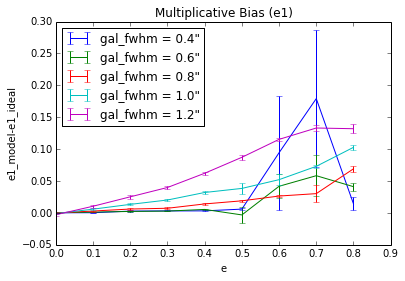

In [22]:
evec = np.arange(0,.85,.1)
for size in np.arange(2,6.1):
    counts_vec = []
    deltaE_vec = []
    noise_vec = []
    for e in evec:
        counts_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['count'])
        deltaE_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['e1']['mean'])
        noise_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['e1']['std'])
    counts_vec = np.array(counts_vec)
    deltaE_vec = np.array(deltaE_vec)
    noise_vec = np.array(noise_vec)
    plt.errorbar(evec, deltaE_vec, yerr=noise_vec/np.sqrt(counts_vec), label='gal_fwhm = '+str(size*.2)+'\"')
plt.legend(loc=0)
plt.xlabel('e')
plt.ylabel('e1_model-e1_ideal')
plt.title('Multiplicative Bias (e1)')

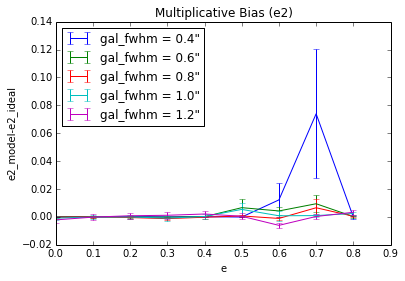

In [23]:
evec = np.arange(0,.85,.1)
for size in np.arange(2,6.1):
    counts_vec = []
    deltaE_vec = []
    noise_vec = []
    for e in evec:
        counts_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['count'])
        deltaE_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['e2']['mean'])
        noise_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['e2']['std'])
    counts_vec = np.array(counts_vec)
    deltaE_vec = np.array(deltaE_vec)
    noise_vec = np.array(noise_vec)
    plt.errorbar(evec, deltaE_vec, yerr=noise_vec/np.sqrt(counts_vec), label='gal_fwhm = '+str(size*.2)+'\"')
plt.legend(loc=0)
plt.xlabel('e')
plt.ylabel('e2_model-e2_ideal')
plt.title('Multiplicative Bias (e2)')

##Effect on astrometry as a function of size

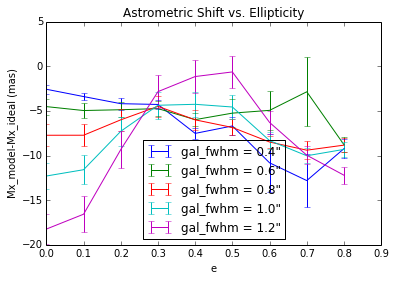

In [24]:
evec = np.arange(0,.85,.1)
for size in np.arange(2,6.1):
    counts_vec = []
    deltaE_vec = []
    noise_vec = []
    for e in evec:
        counts_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['count'])
        deltaE_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['mean'])
        noise_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['std'])
    counts_vec = np.array(counts_vec)
    deltaE_vec = np.array(deltaE_vec)
    noise_vec = np.array(noise_vec)
    plt.errorbar(evec, deltaE_vec, yerr=noise_vec/np.sqrt(counts_vec), label='gal_fwhm = '+str(size*.2)+'\"')
plt.legend(loc=0)
plt.xlabel('e')
plt.ylabel('Mx_model-Mx_ideal (mas)')
plt.title('Astrometric Shift vs. Ellipticity')

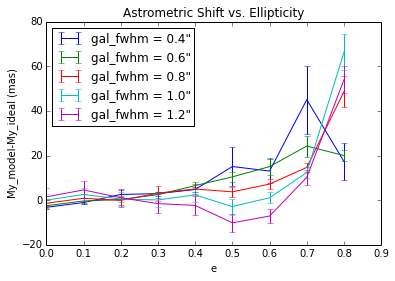

In [25]:
evec = np.arange(0,.85,.1)
for size in np.arange(2,6.1):
    counts_vec = []
    deltaE_vec = []
    noise_vec = []
    for e in evec:
        counts_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['count'])
        deltaE_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['My']['mean'])
        noise_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['My']['std'])
    counts_vec = np.array(counts_vec)
    deltaE_vec = np.array(deltaE_vec)
    noise_vec = np.array(noise_vec)
    plt.errorbar(evec, deltaE_vec, yerr=noise_vec/np.sqrt(counts_vec), label='gal_fwhm = '+str(size*.2)+'\"')
plt.legend(loc=0)
plt.xlabel('e')
plt.ylabel('My_model-My_ideal (mas)')
plt.title('Astrometric Shift vs. Ellipticity')

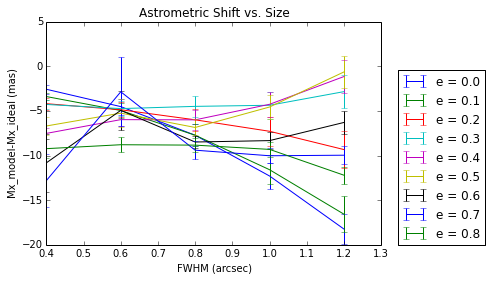

In [26]:
evec = np.arange(0,.85,.1)
svec = np.arange(2,6.1)
for e in evec:
    counts_vec = []
    deltaE_vec = []
    noise_vec = []
    for size in svec:
        counts_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['count'])
        deltaE_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['mean'])
        noise_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['std'])
    counts_vec = np.array(counts_vec)
    deltaE_vec = np.array(deltaE_vec)
    noise_vec = np.array(noise_vec)
    plt.errorbar(.2*svec, deltaE_vec, yerr=noise_vec/np.sqrt(counts_vec), label='e = '+str(np.round(e,decimals=1)))
plt.legend(loc=(1.05,0))
plt.xlabel('FWHM (arcsec)')
plt.ylabel('Mx_model-Mx_ideal (mas)')
plt.title('Astrometric Shift vs. Size')

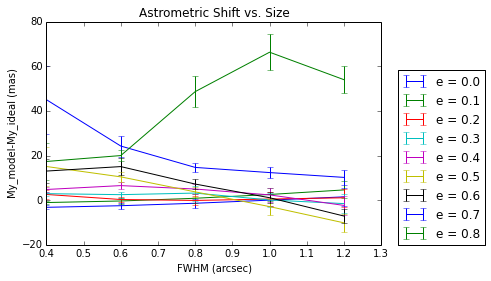

In [27]:
evec = np.arange(0,.85,.1)
svec = np.arange(2,6.1)
for e in evec:
    counts_vec = []
    deltaE_vec = []
    noise_vec = []
    for size in svec:
        counts_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['count'])
        deltaE_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['My']['mean'])
        noise_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['My']['std'])
    counts_vec = np.array(counts_vec)
    deltaE_vec = np.array(deltaE_vec)
    noise_vec = np.array(noise_vec)
    plt.errorbar(.2*svec, deltaE_vec, yerr=noise_vec/np.sqrt(counts_vec), label='e = '+str(np.round(e,decimals=1)))
plt.legend(loc=(1.05,0))
plt.xlabel('FWHM (arcsec)')
plt.ylabel('My_model-My_ideal (mas)')
plt.title('Astrometric Shift vs. Size')

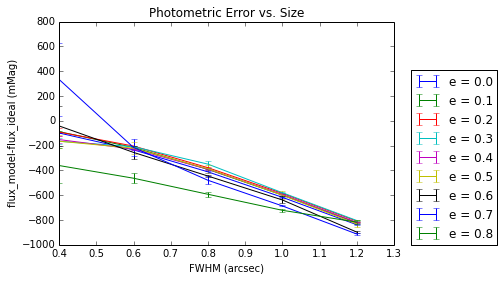

In [28]:
evec = np.arange(0,.85,.1)
svec = np.arange(2,6.1)
for e in evec:
    counts_vec = []
    deltaE_vec = []
    noise_vec = []
    for size in svec:
        counts_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['count'])
        deltaE_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['flux']['mean'])
        noise_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['flux']['std'])
    counts_vec = np.array(counts_vec)
    deltaE_vec = np.array(deltaE_vec)
    noise_vec = np.array(noise_vec)
    plt.errorbar(.2*svec, deltaE_vec, yerr=noise_vec/np.sqrt(counts_vec), label='e = '+str(np.round(e,decimals=1)))
plt.legend(loc=(1.05,0))
plt.xlabel('FWHM (arcsec)')
plt.ylabel('flux_model-flux_ideal (mMag)')
plt.title('Photometric Error vs. Size')

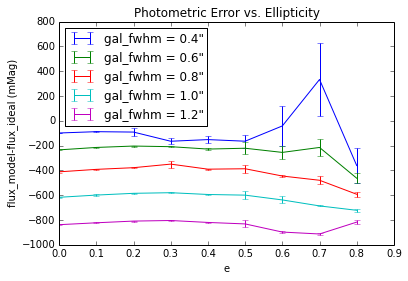

In [29]:
evec = np.arange(0,.85,.1)
for size in np.arange(2,6.1):
    counts_vec = []
    deltaE_vec = []
    noise_vec = []
    for e in evec:
        counts_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['Mx']['count'])
        deltaE_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['flux']['mean'])
        noise_vec.append(stats.loc[(np.round(e,decimals=1),size,0)]['flux']['std'])
    counts_vec = np.array(counts_vec)
    deltaE_vec = np.array(deltaE_vec)
    noise_vec = np.array(noise_vec)
    plt.errorbar(evec, deltaE_vec, yerr=noise_vec/np.sqrt(counts_vec), label='gal_fwhm = '+str(size*.2)+'\"')
plt.legend(loc=0)
plt.xlabel('e')
plt.ylabel('flux_model-flux_ideal (mMag)')
plt.title('Photometric Error vs. Ellipticity')